In [1]:
import pandas as pd
import numpy as np

/Users/alex_1/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


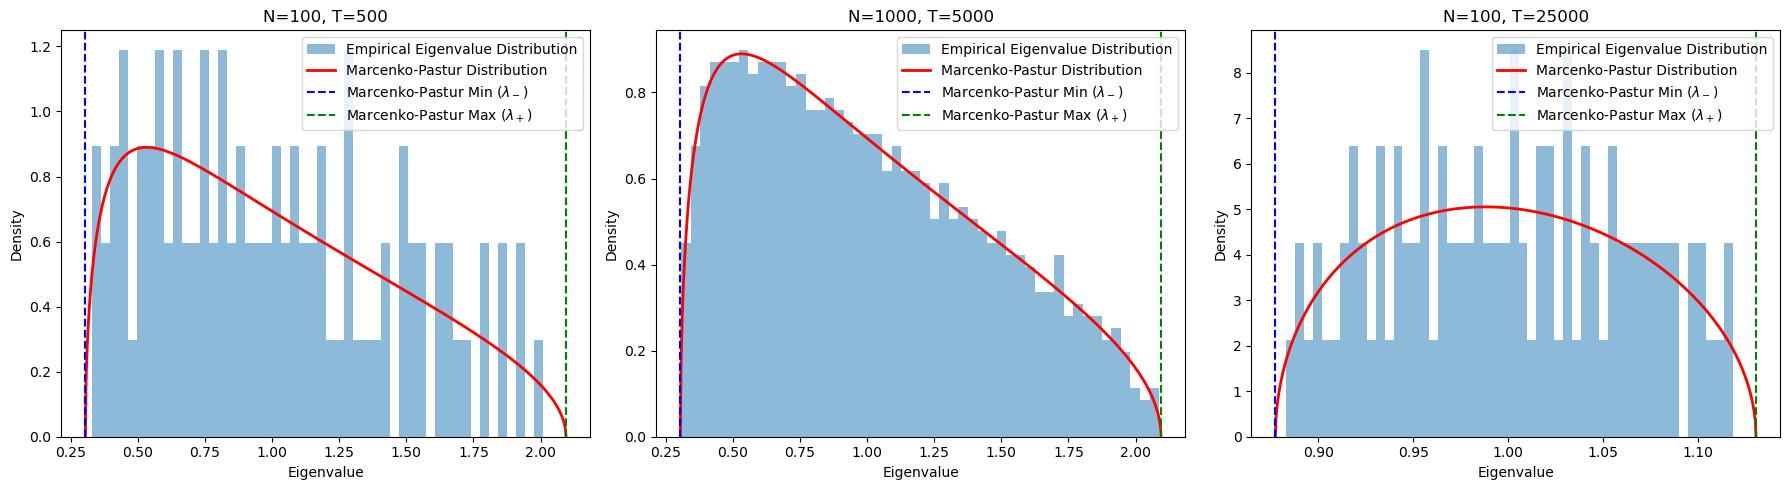

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Marcenko-Pastur PDF function
def marcenko_pastur_pdf(lambda_val, q): #q = T / N
    lambda_min = (1 - np.sqrt(1 / q))**2
    lambda_max = (1 + np.sqrt(1 / q))**2
    if lambda_min <= lambda_val <= lambda_max:
        return (q / (2 * np.pi * lambda_val)) * np.sqrt((lambda_max - lambda_val) * (lambda_val - lambda_min))
    else:
        return 0

# Function to generate eigenvalue distribution and plot Marcenko-Pastur distribution for given N and T
def plot_marcenko_pastur(N, T, subplot_position):
    # Generate random data for given N and T
    random_data = np.random.normal(size=(T, N))
    
    random_correlation_matrix = np.corrcoef(random_data, rowvar=False) #By specifying rowvar=False, you are telling np.corrcoef to treat the columns as the variables 

    # Calculate eigenvalues of the random correlation matrix
    eigenvalues = np.linalg.eigvalsh(random_correlation_matrix)

    # Marcenko-Pastur distribution parameters
    q = T / N
    lambda_min = (1 - np.sqrt(1 / q))**2
    lambda_max = (1 + np.sqrt(1 / q))**2

    # Generate Marcenko-Pastur distribution values for refined range
    lambda_values = np.linspace(lambda_min, lambda_max, 1000)
    marcenko_pastur_values = [marcenko_pastur_pdf(lmbd, q) for lmbd in lambda_values]
    
    # Plotting in the specified subplot
    plt.subplot(1, 3, subplot_position)
    plt.hist(eigenvalues, bins=50, density=True, alpha=0.5, label="Empirical Eigenvalue Distribution") #Denisty = true makes the histogram normalized to form a probability density instead of just raw counts
    plt.plot(lambda_values, marcenko_pastur_values, color='red', lw=2, label="Marcenko-Pastur Distribution")
    plt.axvline(lambda_min, color='blue', linestyle='--', label="Marcenko-Pastur Min ($\lambda_-$)")
    plt.axvline(lambda_max, color='green', linestyle='--', label="Marcenko-Pastur Max ($\lambda_+$)")
    plt.xlabel("Eigenvalue")
    plt.ylabel("Density")
    plt.title(f"N={N}, T={T}")
    plt.legend()

# Plot settings for 3 subplots with adjusted third matrix size
plt.figure(figsize=(18, 5))

# First plot with N=100, T=500
plot_marcenko_pastur(N=100, T=500, subplot_position=1)

# Second plot with N=1000, T=5000
plot_marcenko_pastur(N=1000, T=5000, subplot_position=2)

# Third plot with adjusted size N=5000, T=25000
plot_marcenko_pastur(N=100, T=25000, subplot_position=3)


# Show the combined plots
plt.tight_layout()
plt.show()


In [43]:
random_matrix = np.random.normal(size=(10, 5))
corr_matrix = np.corrcoef(random_matrix, rowvar=False) #By specifying rowvar=False, you are telling np.corrcoef to treat the columns as the variables 
corr_matrix.shape

(5, 5)

# The adjustment factor T/N​ is critical for adapting the Marcenko-Pastur distribution to the specific case of correlation matrices derived from random time series (or random variables). This factor:

    Corrects for the finite sample size of the empirical correlation matrix.

    Ensures the eigenvalue spectrum is correctly scaled to reflect the structured correlations between the variables, as opposed to the independent entries assumed in general random matrices.

    Makes the distribution more accurate for real world data, where the correlations between variables must be taken into account.

* ##  Eigenvalues larger than λ+​ are considered meaningful because they reflect real structure in the data,because they suggest that the data exhibits MORE correlation or dependency between variables than random noise would explain.


* ##  Eigenvalues smaller than λ− are viewed as noise because they do not contribute significantly to explaining the variability in the data, and are usually treated as statistical outliers. These eigenvalues correspond to eigenvectors that are associated with minor variations in the data that cannot be attributed to any systematic or inherent structure